# Exploratory data analysis

### 1. Import libraries

In [240]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt

### 2. Load dataset

In [241]:
df_tweet = pd.read_csv("../data/train_E6oV3lV.csv")
df_tweet.head(5)

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [242]:
print("Type of the dataset: ", type(df_tweet))
print("Keys: ", df_tweet.keys())

Type of the dataset:  <class 'pandas.core.frame.DataFrame'>
Keys:  Index(['id', 'label', 'tweet'], dtype='object')


### 3. Check dataset

In [243]:
df_tweet.shape

(31962, 3)

In [244]:
df_tweet.dtypes

id        int64
label     int64
tweet    object
dtype: object

In [245]:
df_tweet.describe()

id         label
count  31962.000000  31962.000000
mean   15981.500000      0.070146
std     9226.778988      0.255397
min        1.000000      0.000000
25%     7991.250000      0.000000
50%    15981.500000      0.000000
75%    23971.750000      0.000000
max    31962.000000      1.000000

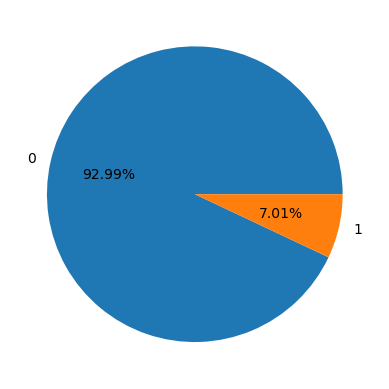

In [246]:
a = list(df_tweet.label.value_counts())
plt.pie(a,labels = [0, 1], autopct='%.2f%%')
plt.show()

### 4. Check duplicate rows

In [247]:
tmp = df_tweet.duplicated(subset=df_tweet.columns.tolist(), keep=False)
duplicated_rows = df_tweet[tmp]
duplicated_rows

Empty DataFrame
Columns: [id, label, tweet]
Index: []

### 5. Check missing or null values

In [248]:
df_tweet.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

## Data Cleaning

### 1. Import libraries

In [336]:
import re
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
# from nltk.corpus import wordnet as wn
from collections import Counter
from heapq import nlargest

### 2. Text Cleaning

In [250]:
df = df_tweet.copy()
df.head()

id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [251]:
def clean_text(tweet): # Remove URLs & mentions
    tweet = re.sub(r'http\S+', '', tweet)
    tweet = re.sub(r'@\w+', '', tweet)
    return tweet

In [252]:
df['tweet'] = df['tweet'].apply(clean_text)
df.head()

id  label                                              tweet
0   1      0    when a father is dysfunctional and is so sel...
1   2      0    thanks for #lyft credit i can't use cause th...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation

In [253]:
## https://www.geeksforgeeks.org/nlp-expand-contractions-in-text-processing/

# Expand contractions in Text Processing
def expand_contractions(tweet):
    expanded_words = []
    for tw in tweet.split():
        #if tw != contractions.fix(tw): print(tw, contractions.fix(tw))
        expanded_words.append(contractions.fix(tw))
    new_text = ' '.join(expanded_words)
    return new_text

In [254]:
df['new_text'] = df['tweet'].apply(expand_contractions)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  
0  when a father is dysfunctional and is so selfi...  
1  thanks for #lyft credit i cannot use because t...  
2                                bihday your majesty  
3  #model i love you take with you all the time i...  
4                factsguide: society now #motivation

In [255]:
def remove_non_alpha(new_text):
    new_text = re.sub(r'[^a-zA-Z0-9\s]', '', new_text)
    return new_text

In [256]:
df['new_text'] = df['new_text'].apply(remove_non_alpha)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  
0  when a father is dysfunctional and is so selfi...  
1  thanks for lyft credit i cannot use because th...  
2                                bihday your majesty  
3  model i love you take with you all the time in...  
4                  factsguide society now motivation

### 3. Tokenization

In [257]:
def tokenizer(new_text):
    tokens = word_tokenize(new_text)
    return tokens

In [258]:
df['tokens'] = df['new_text'].apply(tokenizer)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for lyft credit i cannot use because th...   
2                                bihday your majesty   
3  model i love you take with you all the time in...   
4                  factsguide society now motivation   

                                              tokens  
0  [when, a, father, is, dysfunctional, and, is, ...  
1  [thanks, for, lyft, credit, i, can, not, use, ...  
2                            [bihday, your, majesty]  
3  [model, i, love, you, take, with, you, all, th...  
4             [factsguide, society, now, motivation]

In [259]:
def to_lowercase(lst_tokens):
    return [token.lower() for token in lst_tokens]

In [260]:
df['tokens'] = df['tokens'].apply(to_lowercase)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for lyft credit i cannot use because th...   
2                                bihday your majesty   
3  model i love you take with you all the time in...   
4                  factsguide society now motivation   

                                              tokens  
0  [when, a, father, is, dysfunctional, and, is, ...  
1  [thanks, for, lyft, credit, i, can, not, use, ...  
2                            [bihday, your, majesty]  
3  [model, i, love, you, take, with, you, all, th...  
4             [factsguide, society, now, motivation]

### 3-1. Detecting Outliers for lenght of tweet

In [261]:
# Check length of tweet
df['length'] = df.tokens.str.len()
df.length.describe()

count    31962.00000
mean        12.35805
std          5.60989
min          0.00000
25%          8.00000
50%         12.00000
75%         16.00000
max         35.00000
Name: length, dtype: float64

<Axes: xlabel='length'>

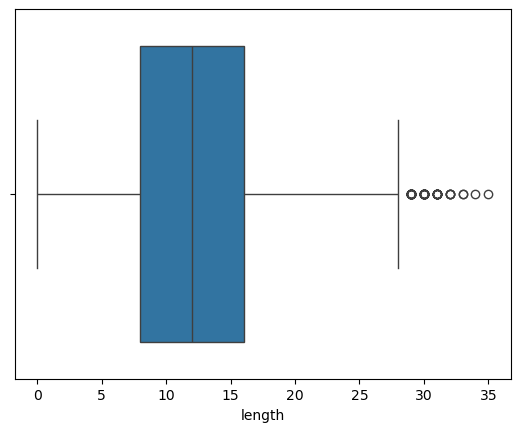

In [262]:
sns.boxplot(x=df['length'])

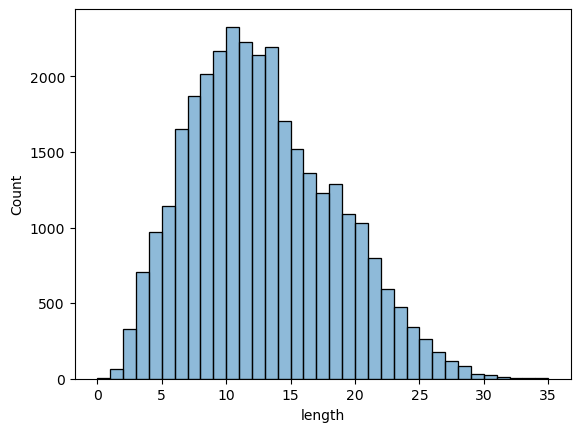

In [281]:
sns.histplot(data=df.length, bins=(max(df.length)-min(df.length)), alpha = 0.5)
plt.show()

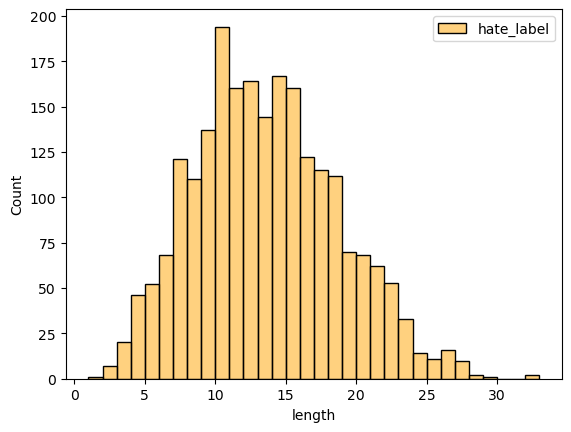

In [282]:
hate_label = df.length[df.label == 1]
sns.histplot(data=hate_label, bins=(max(hate_label)-min(hate_label)), alpha = 0.5, color='orange')
plt.legend(labels=['hate_label'])
plt.show()

In [283]:
Q1 = df['length'].quantile(.25)
Q3 = df['length'].quantile(.75)
IQR = Q3 - Q1

(31962, 6)
(31411, 6)


<Axes: xlabel='length'>

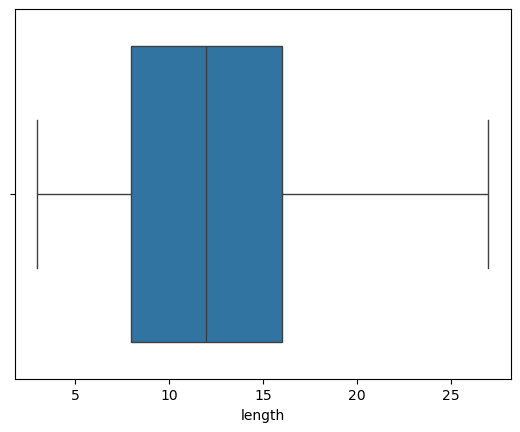

In [284]:
print(df.shape)
df_trimmed = df[((df.length < (Q3 + 1.5 * IQR)) & (df.length > 2))]
print(df_trimmed.shape)
sns.boxplot(x=df_trimmed['length'])

In [285]:
df_trimmed.length.describe()

count    31411.000000
mean        12.403489
std          5.405105
min          3.000000
25%          8.000000
50%         12.000000
75%         16.000000
max         27.000000
Name: length, dtype: float64

### 3. Removing Stopwords

In [286]:
def remove_stopwords(lst_tokens):
    stop_words = set(stopwords.words('english'))
    return [token for token in lst_tokens if token not in stop_words]

In [287]:
df['tokens'] = df['tokens'].apply(remove_stopwords)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for lyft credit i cannot use because th...   
2                                bihday your majesty   
3  model i love you take with you all the time in...   
4                  factsguide society now motivation   

                                              tokens  length  
0  [father, dysfunctional, selfish, drags, kids, ...      17  
1  [thanks, lyft, credit, use, offer, wheelchair,...      19  
2                                  [bihday, majesty]       3  
3                          [model, love, take, time]      13  
4                  [factsguide, society, motivation]       4

### 4. Lemmatization or Stemming

In [288]:
def lemmatizer_tokens(lst_tokens):
    lemmatizer = WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in lst_tokens]

In [289]:
df['tokens'] = df['tokens'].apply(lemmatizer_tokens)
df.head()

id  label                                              tweet  \
0   1      0    when a father is dysfunctional and is so sel...   
1   2      0    thanks for #lyft credit i can't use cause th...   
2   3      0                                bihday your majesty   
3   4      0  #model   i love u take with u all the time in ...   
4   5      0             factsguide: society now    #motivation   

                                            new_text  \
0  when a father is dysfunctional and is so selfi...   
1  thanks for lyft credit i cannot use because th...   
2                                bihday your majesty   
3  model i love you take with you all the time in...   
4                  factsguide society now motivation   

                                              tokens  length  
0  [father, dysfunctional, selfish, drag, kid, dy...      17  
1  [thanks, lyft, credit, use, offer, wheelchair,...      19  
2                                  [bihday, majesty]       3  
3                          [model, love, take, time]      13  
4                  [factsguide, society, motivation]       4

### 5.Word Frequency Analysis

In [340]:
total_words = []
hate_tweets = []

for i in range(df.shape[0]):
    if df.label[i] == 1:
        for j in df.tokens[i]:
            total_words.append(j)
            hate_tweets.append(j)
    else:
        for j in df.tokens[i]:
            total_words.append(j)

print(len(total_words), len(hate_tweets))

246181 18145


In [341]:
word_count = Counter(total_words)
dict(word_count.most_common(10))

{'love': 2795,
 'day': 2749,
 'happy': 1691,
 'amp': 1602,
 'time': 1235,
 'life': 1235,
 'like': 1085,
 'today': 1083,
 'get': 1000,
 'new': 988}

In [342]:
hate_count = Counter(hate_tweets)
dict(hate_count.most_common(10))

{'amp': 283,
 'trump': 216,
 'white': 153,
 'libtard': 149,
 'black': 146,
 'like': 140,
 'woman': 120,
 'racist': 109,
 'people': 106,
 'politics': 97}

### 6. Generate Word Clouds

In [343]:
from wordcloud import WordCloud
import matplotlib

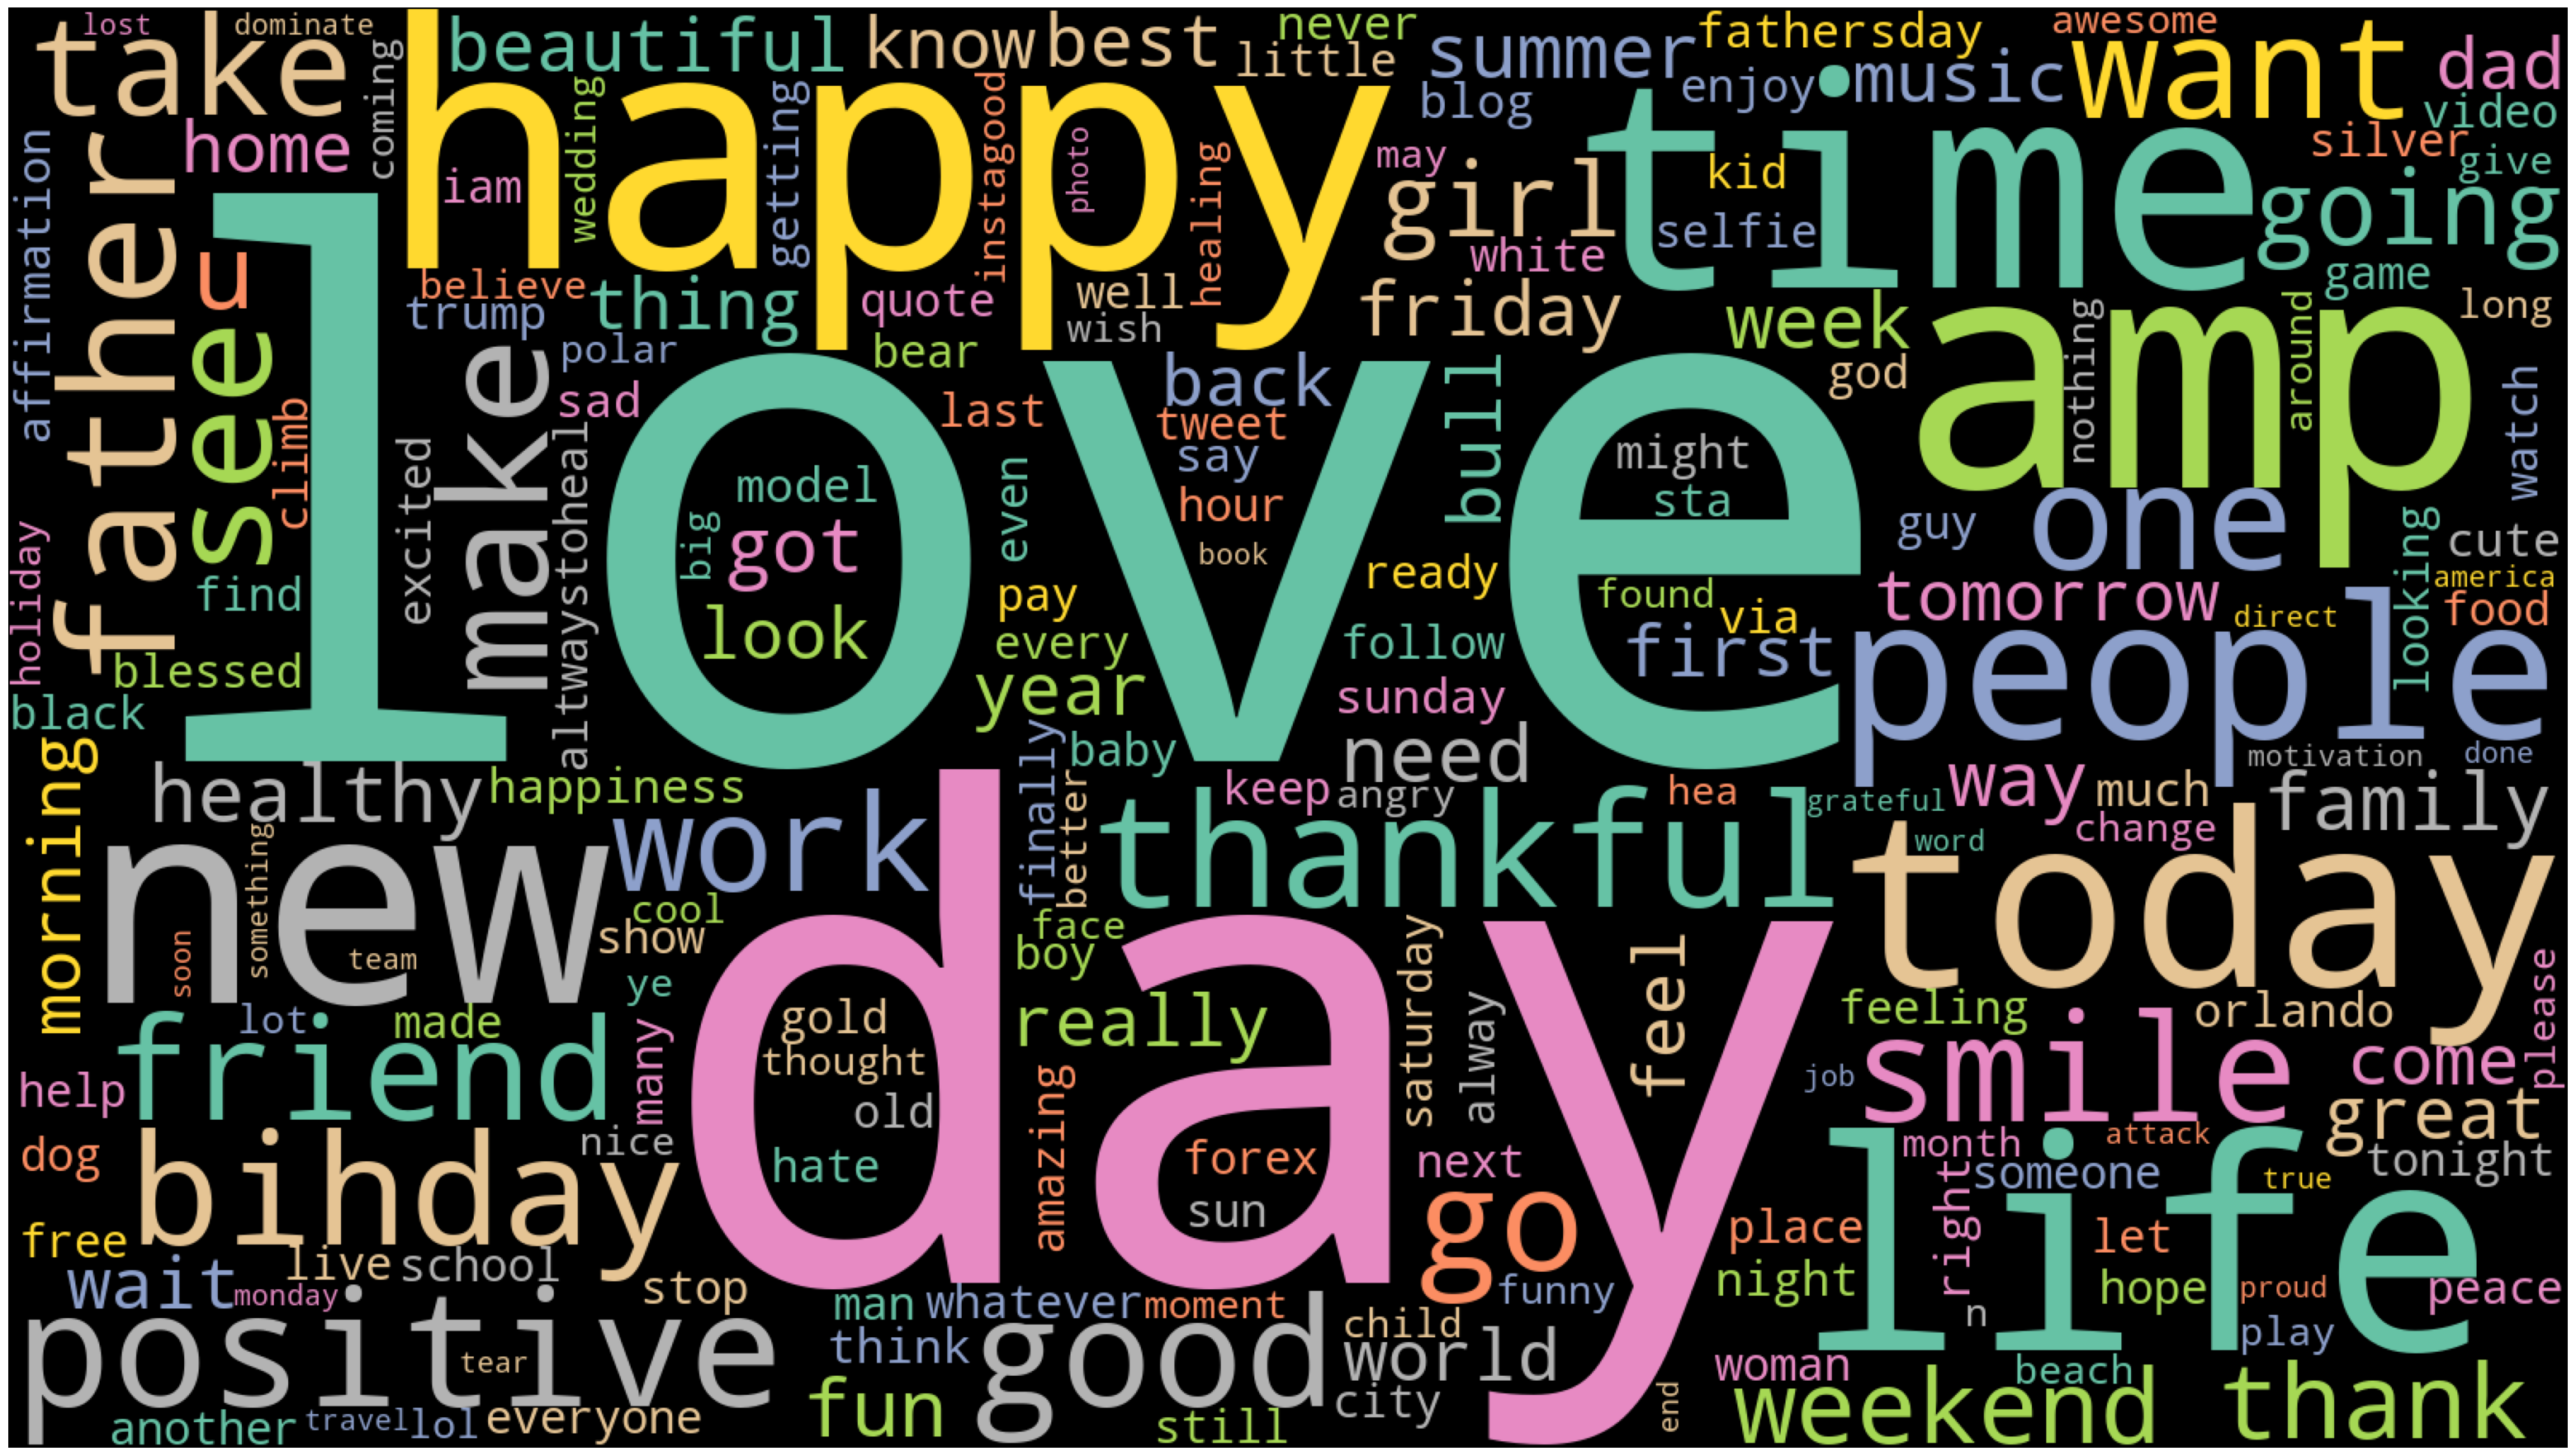

In [344]:
wordcloud = WordCloud(width=1600, height=900, random_state=1,
                      background_color='black', colormap='Set2',
                      collocations=False).generate(' '.join(total_words))

# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")

# Save image
wordcloud.to_file("wordcloud_total.png")

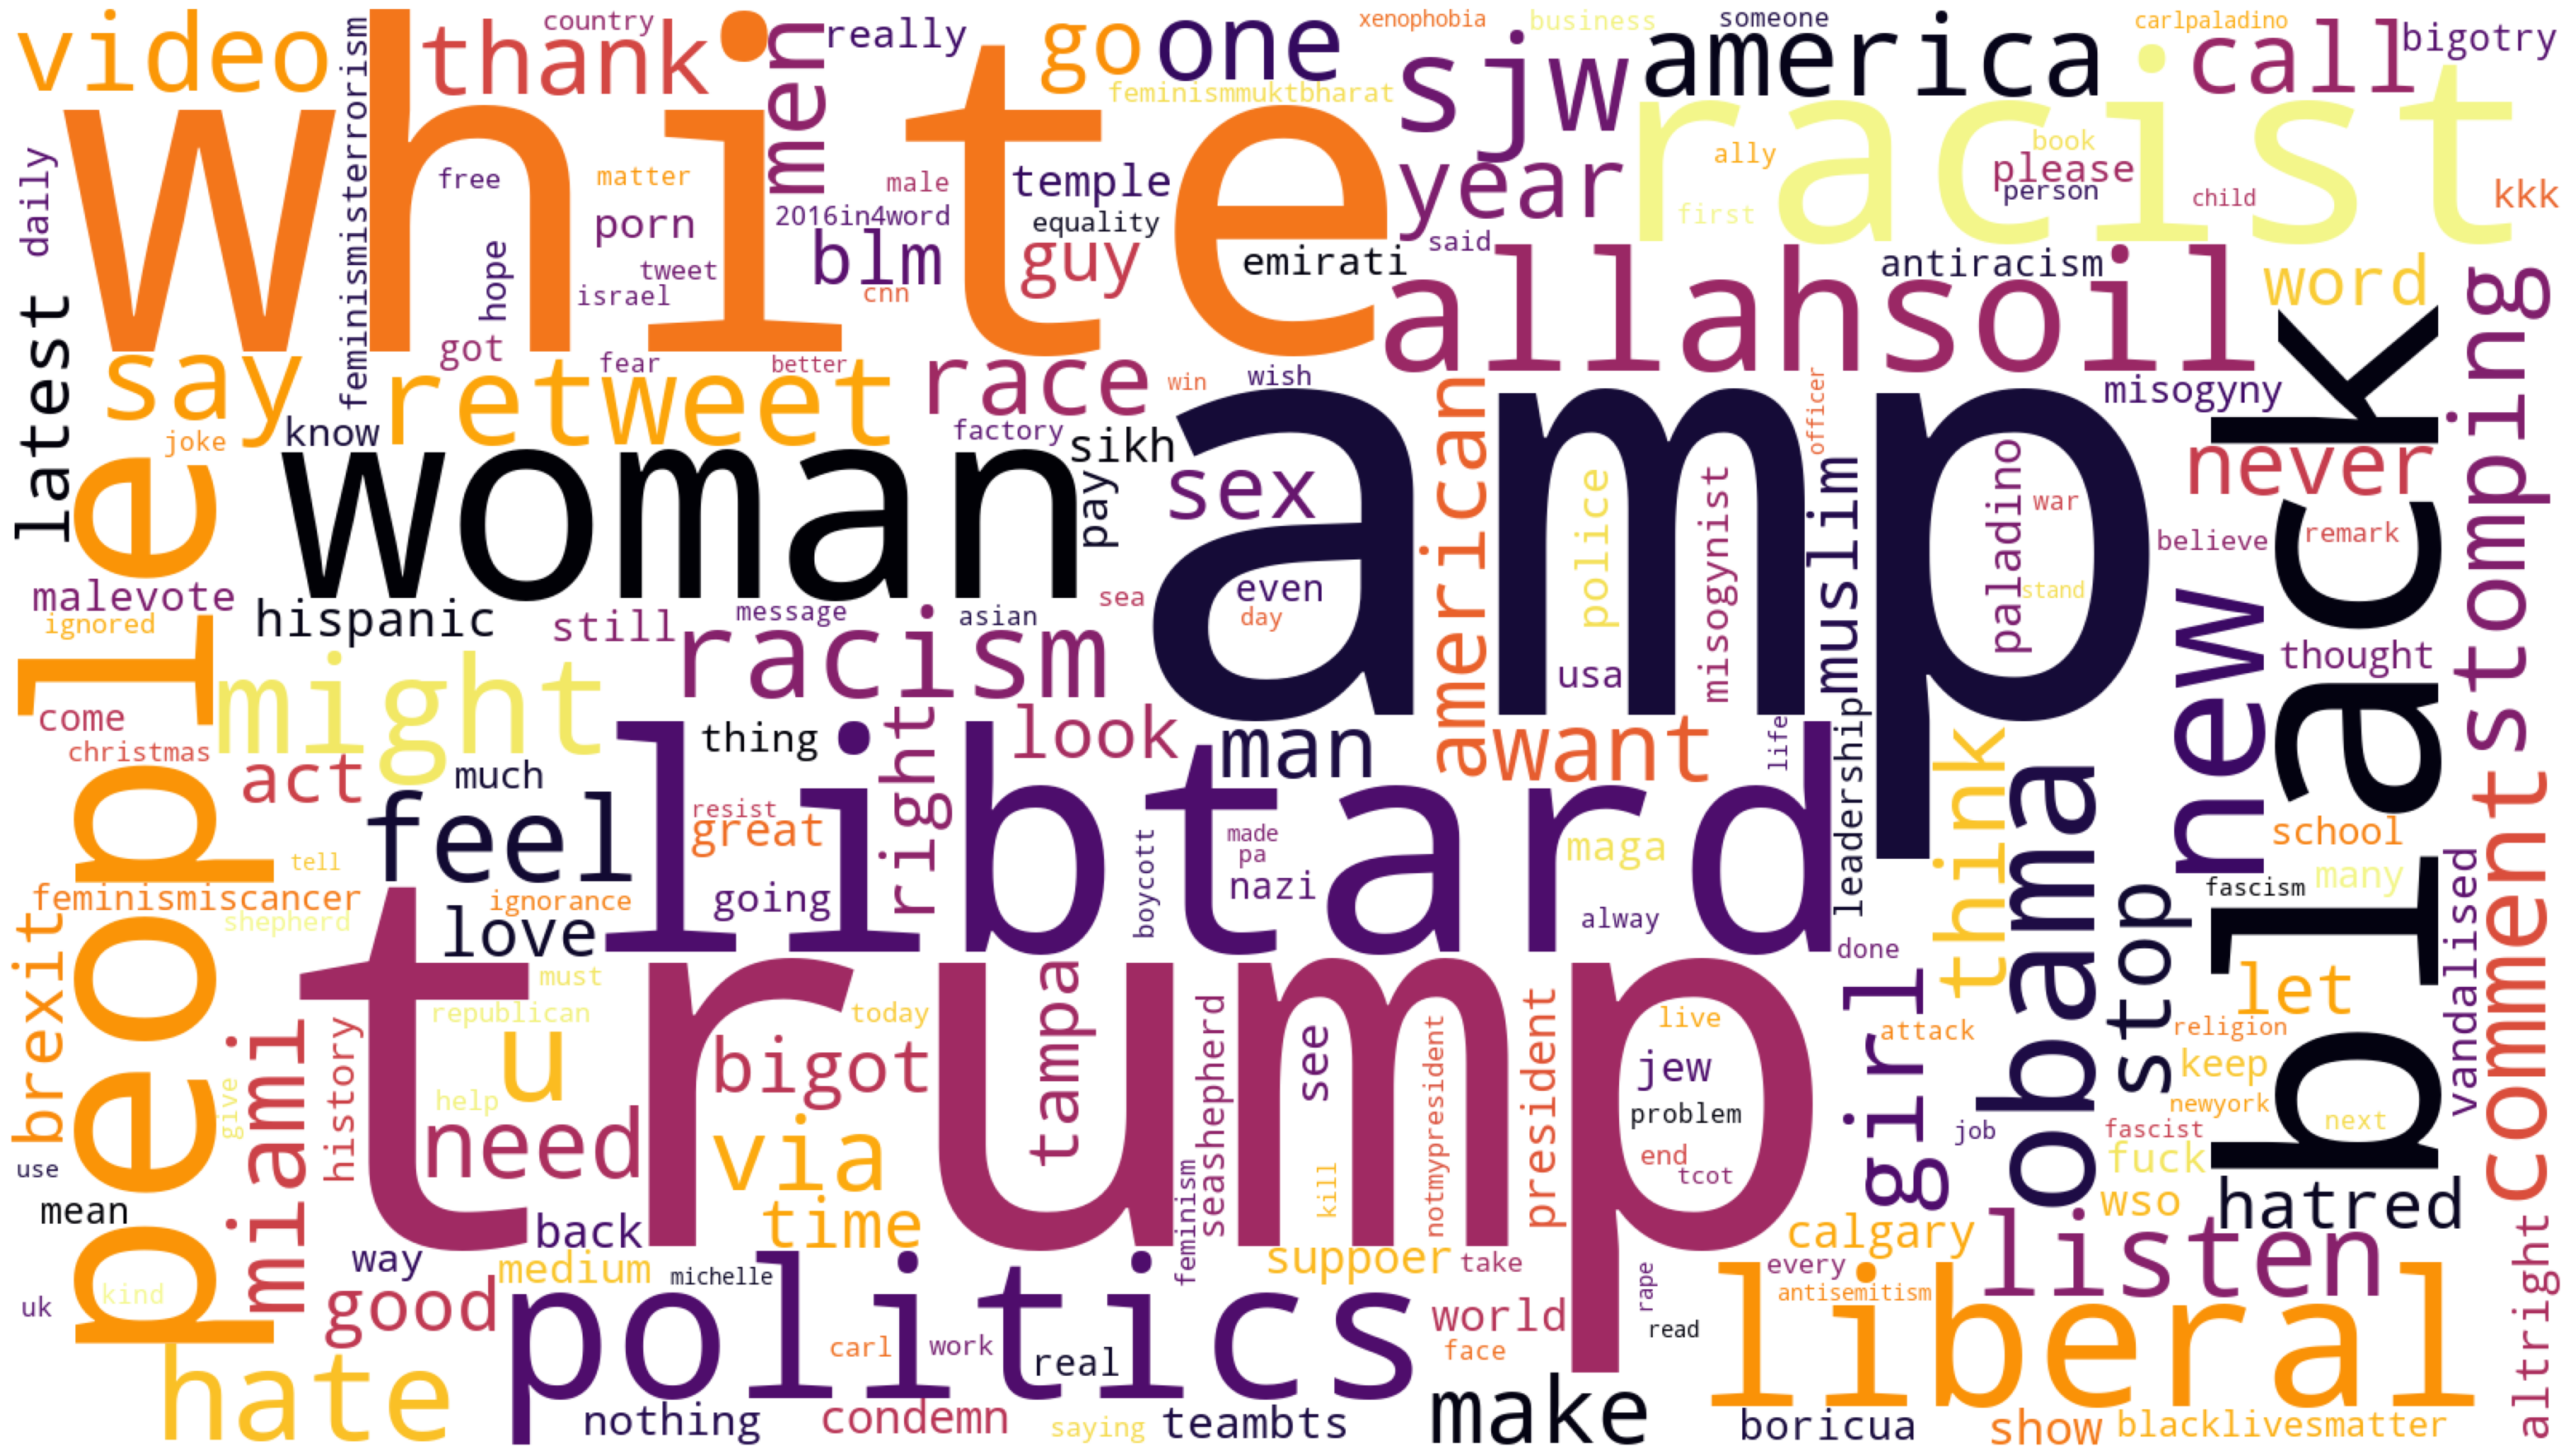

In [345]:
wordcloud = WordCloud(width=1600, height=900, random_state=1,
                      background_color="white", colormap=matplotlib.cm.inferno,
                      collocations=False).generate(' '.join(hate_tweets))

# Plot
plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis("off")

# Save image
wordcloud.to_file("wordcloud_hate.png")